In [3]:
from google.colab import files
uploaded=files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('airline_passengers.csv')

In [6]:
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
from prophet import Prophet

In [8]:
df.columns=['ds','y']

In [9]:
df['ds']=pd.to_datetime(df['ds'])

In [10]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [11]:
m=Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxpbka4c/kfa8c5gd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxpbka4c/hubsapav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50173', 'data', 'file=/tmp/tmpoxpbka4c/kfa8c5gd.json', 'init=/tmp/tmpoxpbka4c/hubsapav.json', 'output', 'file=/tmp/tmpoxpbka4c/prophet_model1a4fwy4c/prophet_model-20250121094020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:40:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:40:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [19]:
future=m.make_future_dataframe(periods=1200,freq='MS')

In [20]:
future.tail()

,ds
1339,2060-08-01
1340,2060-09-01
1341,2060-10-01
1342,2060-11-01
1343,2060-12-01


In [21]:
forecast=m.predict(future)

In [22]:
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1332,2060-01-01,4140.783989,3396.725385,4785.769898,3428.717653,4800.607029,-24.588106,-24.588106,-24.588106,-24.588106,-24.588106,-24.588106,0.0,0.0,0.0,4116.195883
1333,2060-02-01,4143.915638,3391.837733,4779.779976,3431.525323,4804.743188,-34.754111,-34.754111,-34.754111,-34.754111,-34.754111,-34.754111,0.0,0.0,0.0,4109.161527
1334,2060-03-01,4146.845245,3429.608520,4797.739589,3434.125348,4808.677305,-2.075445,-2.075445,-2.075445,-2.075445,-2.075445,-2.075445,0.0,0.0,0.0,4144.769800
1335,2060-04-01,4149.976894,3408.633429,4815.701384,3436.350984,4812.813463,-3.971391,-3.971391,-3.971391,-3.971391,-3.971391,-3.971391,0.0,0.0,0.0,4146.005503
1336,2060-05-01,4153.007523,3437.603233,4810.363924,3438.165574,4816.848601,-4.418248,-4.418248,-4.418248,-4.418248,-4.418248,-4.418248,0.0,0.0,0.0,4148.589275
1337,2060-06-01,4156.139172,3468.445673,4856.680734,3440.810407,4820.985880,35.217297,35.217297,35.217297,35.217297,35.217297,35.217297,0.0,0.0,0.0,4191.356469
1338,2060-07-01,4159.169800,3508.307456,4902.453531,3442.731322,4825.023257,70.715749,70.715749,70.715749,70.715749,70.715749,70.715749,0.0,0.0,0.0,4229.885549
1339,2060-08-01,4162.301449,3508.074501,4903.595000,3444.705414,4829.161656,68.481906,68.481906,68.481906,68.481906,68.481906,68.481906,0.0,0.0,0.0,4230.783355
1340,2060-09-01,4165.433098,3455.658518,4853.219724,3446.686913,4833.300055,16.162119,16.162119,16.162119,16.162119,16.162119,16.162119,0.0,0.0,0.0,4181.595218
1341,2060-10-01,4168.463727,3412.647461,4814.763653,3448.595340,4837.229017,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,0.0,0.0,0.0,4146.987723


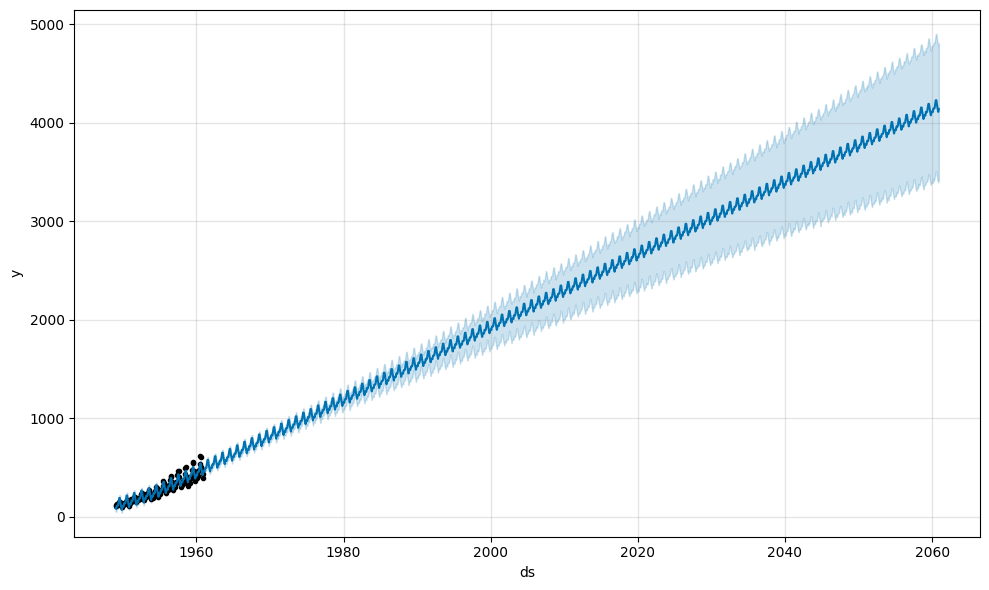

In [23]:
m.plot(forecast);